In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, SimpleRNN
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import accuracy_score

import seaborn as sns

In [10]:
#  from google.colab import drive
#  drive.mount('/content/drive')
#  reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yelp.csv')

reviews = pd.read_csv('yelp.csv')


In [3]:
reviews.tail(10)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
9990,R8VwdLyvsp9iybNqRvm94g,2011-10-03,pcEeHdAJPoFNF23es0kKWg,5,Yes I do rock the hipster joints. I dig this ...,review,b92Y3tyWTQQZ5FLifex62Q,1,1,1
9991,WJ5mq4EiWYAA4Vif0xDfdg,2011-12-05,EuHX-39FR7tyyG1ElvN1Jw,5,Only 4 stars? \n\n(A few notes: The folks that...,review,hTau-iNZFwoNsPCaiIUTEA,1,1,0
9992,f96lWMIAUhYIYy9gOktivQ,2009-03-10,YF17z7HWlMj6aezZc-pVEw,5,I'm not normally one to jump at reviewing a ch...,review,W_QXYA7A0IhMrvbckz7eVg,2,3,2
9993,maB4VHseFUY2TmPtAQnB9Q,2011-06-27,SNnyYHI9rw9TTltVX3TF-A,4,"Judging by some of the reviews, maybe I went o...",review,T46gxPbJMWmlLyr7GxQLyQ,1,1,0
9994,L3BSpFvxcNf3T_teitgt6A,2012-03-19,0nxb1gIGFgk3WbC5zwhKZg,5,Let's see...what is there NOT to like about Su...,review,OzOZv-Knlw3oz9K5Kh5S6A,1,2,1
9995,VY_tvNUCCXGXQeSvJl757Q,2012-07-28,Ubyfp2RSDYW0g7Mbr8N3iA,3,First visit...Had lunch here today - used my G...,review,_eqQoPtQ3e3UxLE4faT6ow,1,2,0
9996,EKzMHI1tip8rC1-ZAy64yg,2012-01-18,2XyIOQKbVFb6uXQdJ0RzlQ,4,Should be called house of deliciousness!\n\nI ...,review,ROru4uk5SaYc3rg8IU7SQw,0,0,0
9997,53YGfwmbW73JhFiemNeyzQ,2010-11-16,jyznYkIbpqVmlsZxSDSypA,4,I recently visited Olive and Ivy for business ...,review,gGbN1aKQHMgfQZkqlsuwzg,0,0,0
9998,9SKdOoDHcFoxK5ZtsgHJoA,2012-12-02,5UKq9WQE1qQbJ0DJbc-B6Q,2,My nephew just moved to Scottsdale recently so...,review,0lyVoNazXa20WzUyZPLaQQ,0,0,0
9999,pF7uRzygyZsltbmVpjIyvw,2010-10-16,vWSmOhg2ID1MNZHaWapGbA,5,4-5 locations.. all 4.5 star average.. I think...,review,KSBFytcdjPKZgXKQnYQdkA,0,0,0


In [4]:
reviews.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [5]:
reviews['text'][9996]

'Should be called house of deliciousness!\n\nI could go on and on about this item, that item, blah blah blah but I dont really waznt to. This is good food, done creatively, and in my mind presented in a casual yet sophisticated manner without any pretensiousness. The chef here creates inspirational dishes that seem to meld asian and southwestern flavors seemlessly. Ok so now I realize this are not all real words but after eating here and developing a drunken state of mind who really cares anyhow?\n\nThe lowdown is the food is good and priced fair for what you get. Our service was great and on top of everything we truly had an amazing time on a rainy Saturday evening. Next time hopefully we can enjoy the killer outdoor bar and patio seating.\nI cant wait to go back and eat our way through the new menu.\n\nThe custom cocktails were delightful and the wine list is pretty spot on.'

In [6]:
reviews['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

<Axes: >

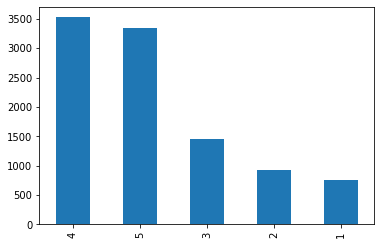

In [7]:
reviews['stars'].value_counts().plot(kind='bar')

In [8]:
# reviews.drop(reviews[reviews.stars == 3].index, inplace=True)

<Axes: >

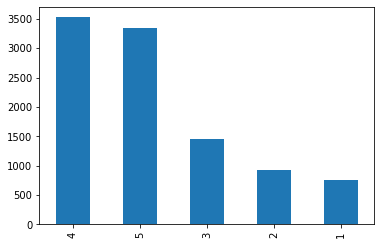

In [11]:
reviews['stars'].value_counts().plot(kind='bar')

all stars 4 and 5 are positive, others are negative


In [12]:
reviews['stars'] = np.where(reviews['stars'] >= 4, 1, 0)

<Axes: >

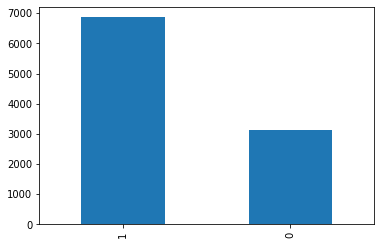

In [13]:
reviews['stars'].value_counts().plot(kind='bar')

removing some items to make 6000 positive reviews


In [14]:
reviews['stars'].value_counts()

1    6863
0    3137
Name: stars, dtype: int64

In [15]:
reviews = reviews.drop(reviews[reviews.stars == 1].iloc[:863].index)

In [ ]:
#sns.countplot(reviews['stars'])

In [16]:
max_features = 6000
# we will use the Tokenizer class: create a word-to-index dictionary. In the word-to-index dictionary
tokenizer = Tokenizer(num_words=max_features, split = ' ')

#tokenizer = Tokenizer(num_words=1000, lower = True)
tokenizer.fit_on_texts(reviews['text'].values)

#to convert sentences into vector /numbers
x = tokenizer.texts_to_sequences(reviews['text'].values)
x = pad_sequences(x)

y = reviews['stars']

In [ ]:
#maxlen= 100
#x = pad_sequences(x,padding='post', maxlen=maxlen)
#print(x[3,:])

In [17]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, shuffle=True
)


In [18]:
print("shape of X_train:", x_train.shape)
print("shape of X_test:", x_test.shape)

shape of X_train: (6395, 927)
shape of X_test: (2742, 927)


In [19]:
print(x_train[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0 

In [20]:
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of y_train: (6395,)
shape of y_test: (2742,)


In [21]:
#Create RNN model
embed_dim = 128
lstm_out = 196
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 128, input_length=x_train.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.5))
model.add(tf.keras.layers.LSTM(196))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))
  

In [22]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 927, 128)          768000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 927, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dropout (Dropout)           (None, 196)               0         
                                                                 
 dense (Dense)               (None, 100)               19700     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                        

In [23]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [24]:
model.fit(x_train, y_train, epochs=10 , batch_size=32, validation_split = 0.2, verbose = 2)

Epoch 1/10
160/160 - 36s - loss: 0.6134 - accuracy: 0.6755 - val_loss: 0.5422 - val_accuracy: 0.7357 - 36s/epoch - 227ms/step
Epoch 2/10
160/160 - 21s - loss: 0.4562 - accuracy: 0.7903 - val_loss: 0.4673 - val_accuracy: 0.7905 - 21s/epoch - 130ms/step
Epoch 3/10
160/160 - 17s - loss: 0.3232 - accuracy: 0.8651 - val_loss: 0.4449 - val_accuracy: 0.7967 - 17s/epoch - 103ms/step
Epoch 4/10
160/160 - 15s - loss: 0.2343 - accuracy: 0.9083 - val_loss: 0.5343 - val_accuracy: 0.8225 - 15s/epoch - 95ms/step
Epoch 5/10
160/160 - 12s - loss: 0.1476 - accuracy: 0.9453 - val_loss: 0.5952 - val_accuracy: 0.7952 - 12s/epoch - 78ms/step
Epoch 6/10
160/160 - 11s - loss: 0.1321 - accuracy: 0.9517 - val_loss: 0.6444 - val_accuracy: 0.7959 - 11s/epoch - 67ms/step
Epoch 7/10
160/160 - 11s - loss: 0.0950 - accuracy: 0.9644 - val_loss: 0.6975 - val_accuracy: 0.7850 - 11s/epoch - 67ms/step
Epoch 8/10
160/160 - 8s - loss: 0.0510 - accuracy: 0.9840 - val_loss: 0.8543 - val_accuracy: 0.7881 - 8s/epoch - 53ms/step

In [25]:
history = model.history
print(history.history['loss'])

[0.6134002208709717, 0.45624256134033203, 0.32324928045272827, 0.23425348103046417, 0.14764617383480072, 0.13210996985435486, 0.0950474739074707, 0.050991736352443695, 0.0478949174284935, 0.051849156618118286]


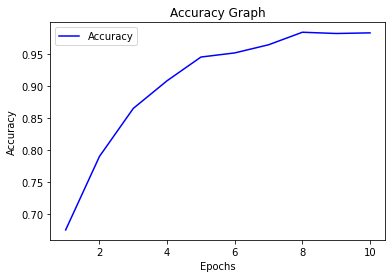

In [26]:
#To plot the accuracy graph 
acc = history.history['accuracy']
epochs = range(1,len(acc)+1)
plt.plot(epochs, acc, 'b', label = 'Accuracy')
plt.title('Accuracy Graph')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

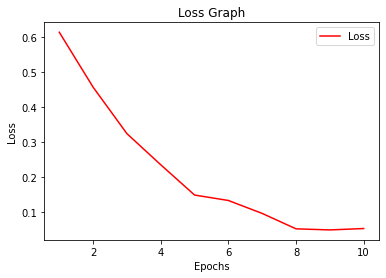

In [27]:
#To plot the Loss graph 
loss = history.history['loss']
epochs = range(1,len(loss)+1)
plt.plot(epochs, loss, 'r', label = 'Loss')
plt.title('Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

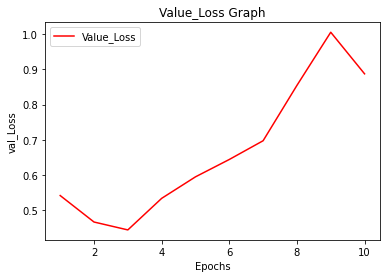

[0.5422437191009521, 0.4672549366950989, 0.4448891282081604, 0.5342787504196167, 0.5952374339103699, 0.6444258093833923, 0.6975147724151611, 0.8542501330375671, 1.0048577785491943, 0.8870506882667542]


In [28]:
#To plot the val_Loss graph 
val_loss = history.history['val_loss']
epochs = range(1,len(val_loss)+1)
plt.plot(epochs, val_loss, 'r', label = 'Value_Loss')
plt.title('Value_Loss Graph')
plt.xlabel('Epochs')
plt.ylabel('val_Loss')
plt.legend()
plt.show()
print(history.history['val_loss'])

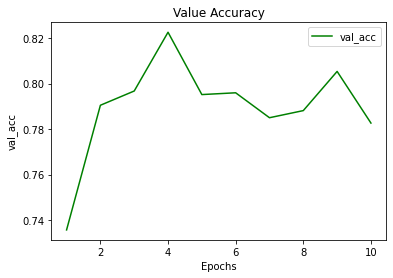

[0.7357310652732849, 0.7904613018035889, 0.7967162132263184, 0.8225175738334656, 0.795152485370636, 0.7959343194961548, 0.784988284111023, 0.7881157398223877, 0.8053166270256042, 0.782642662525177]


In [29]:

#To plot the Loss graph 
val_acc = history.history['val_accuracy']
epochs = range(1,len(val_acc)+1)
plt.plot(epochs, val_acc, 'g', label = 'val_acc')
plt.title('Value Accuracy')
plt.xlabel('Epochs')
plt.ylabel('val_acc')
plt.legend()
plt.show()
print(history.history['val_accuracy'])

In [30]:
#To test the accuracy score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print('Accuracy Score', accuracy_score(y_test, y_pred_classes))

86/86 [==============================] - 2s 18ms/step
Accuracy Score 0.7676878191101386


In [31]:
#Testing model on new input
sample = "Should be called house of deliciousness!\n\nI could go on and on about this item, that item, blah blah blah but I dont really waznt to. This is good food, done creatively,"\
 "and in my mind presented in a casual yet sophisticated manner without any pretensiousness. The chef here creates inspirational dishes that seem to meld asian and southwestern flavors seemlessly."\
 "Ok so now I realize this are not all real words but after eating here and developing a drunken state of mind who really cares anyhow?\n\nThe lowdown is the food is good and priced fair for what you get."\
   "Our service was great and on top of everything we truly had an amazing time on a rainy Saturday evening. Next time hopefully we can enjoy the killer outdoor"\
 "bar and patio seating.\nI cant wait to go back and eat our way through the new menu.\n\nThe custom cocktails were delightful and the wine list is pretty spot on"

sample_item = [sample]
sample_item = tokenizer.texts_to_sequences(sample_item)
sample_item = pad_sequences(sample_item, maxlen=len(sample) + 1)

print(sample_item)
sentiment = model.predict(sample_item,batch_size=1,verbose = 2)[0]

if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")


[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0   

In [32]:
#Testing model on new input
#sample = " this service is mad"
sample = "the food is very bad" 
sample_item = [sample]
sample_item = tokenizer.texts_to_sequences(sample_item)
sample_item = pad_sequences(sample_item, maxlen=len(sample) + 1)

print(sample_item)
sentiment = model.predict(sample_item,batch_size=1,verbose = 2)[0]

if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1  29
    9  41 172]]
1/1 - 0s - 18ms/epoch - 18ms/step
negative
